# Import libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Create data frame

In [2]:
pwd

'/Users/rogerserret/Documents/GitHub/IronRoger/week5_midbootcamp_project/Project'

In [3]:
cd ..

/Users/rogerserret/Documents/GitHub/IronRoger/week5_midbootcamp_project


In [4]:
cd data_mid_bootcamp_project_classification-master

/Users/rogerserret/Documents/GitHub/IronRoger/week5_midbootcamp_project/data_mid_bootcamp_project_classification-master


In [5]:
df = pd.read_excel('creditcardmarketing.xlsx')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [7]:
df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


# Cleaning the data frame

## Column names cleaning

In [8]:
# remove column name spaces, put everything in lowercase and remove #
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df.rename(columns={'#_bank_accounts_open': 'bank_accounts_open','#_credit_cards_held': 'credit_cards_held','#_homes_owned':'homes_owned'},inplace=True, errors='raise')

In [9]:
df.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size',
       'own_your_home', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance'],
      dtype='object')

## Check duplicates

In [10]:
df.duplicated().sum() # check number of duplicates

0

## Deal with nulls

In [11]:
df[df.isna().any(axis=1)] 
# We only have 21 rows that contain nulls
# We can drop their rows as they only represent a 0,1%& of the total rows and they are randomly located 

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
323,324,No,Points,Postcard,Medium,1,No,High,1,1,4,No,NaN,NaN,NaN,NaN,NaN
3070,3071,Yes,Air Miles,Postcard,Low,3,No,Medium,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3108,3109,No,Air Miles,Letter,Low,1,No,High,3,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3789,3790,No,Air Miles,Letter,Medium,2,No,High,3,1,3,No,NaN,NaN,NaN,NaN,NaN
5083,5084,No,Points,Letter,Medium,1,No,High,1,1,3,Yes,NaN,NaN,NaN,NaN,NaN
5677,5678,No,Air Miles,Postcard,Low,1,No,Low,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
5689,5690,No,Air Miles,Postcard,Medium,1,No,Medium,3,1,5,No,NaN,NaN,NaN,NaN,NaN
6932,6933,No,Air Miles,Postcard,Medium,1,No,Medium,2,2,4,Yes,NaN,NaN,NaN,NaN,NaN
7787,7788,No,Air Miles,Letter,Low,2,No,Low,1,1,4,Yes,NaN,NaN,NaN,NaN,NaN
7864,7865,No,Cash Back,Postcard,High,2,Yes,Low,2,1,3,No,NaN,NaN,NaN,NaN,NaN


In [12]:
df.dropna(inplace=True)

# Split the data into numericals and categoricals for EDA

In [13]:
d_num=df.select_dtypes(np.number)
d_cat=df.select_dtypes(object)

# Numerical columns handling

In [14]:
d_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_number     17976 non-null  int64  
 1   bank_accounts_open  17976 non-null  int64  
 2   credit_cards_held   17976 non-null  int64  
 3   homes_owned         17976 non-null  int64  
 4   household_size      17976 non-null  int64  
 5   average_balance     17976 non-null  float64
 6   q1_balance          17976 non-null  float64
 7   q2_balance          17976 non-null  float64
 8   q3_balance          17976 non-null  float64
 9   q4_balance          17976 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.5 MB


In [15]:
d_num. describe()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,8999.727192,1.255730,1.903427,1.203549,3.499110,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.958865,0.472405,0.797086,0.427446,1.114476,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4498.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13501.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


## Check outliers

In [16]:
# By means of the automatic sweetviz report, we generate a histogram of each columns to see if we detect any outliers that we need to deal with 
import sweetviz as sv

In [17]:
my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"
# We decide to keep all outliers as there are no suspicious values that could hinder our model (the outliers seem to be coherent)

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


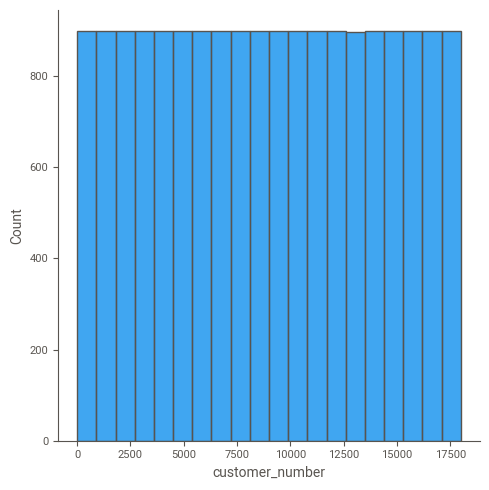

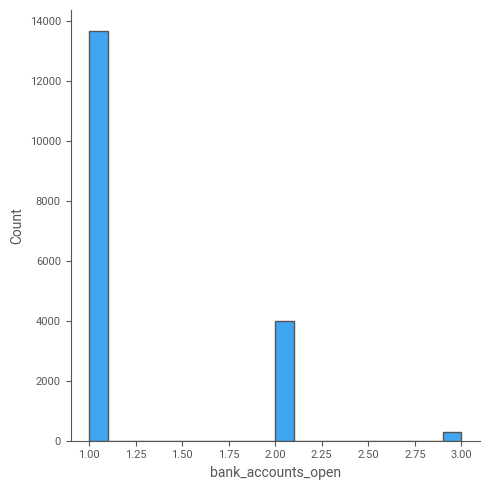

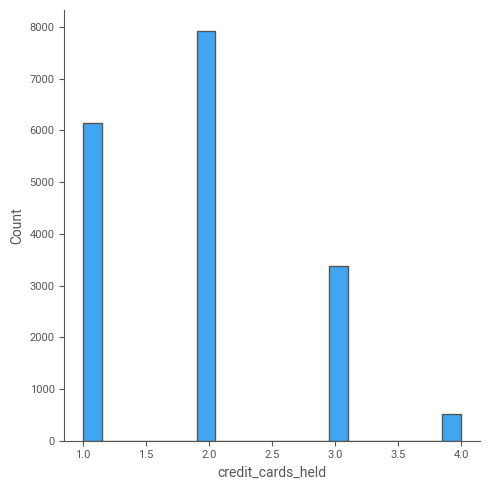

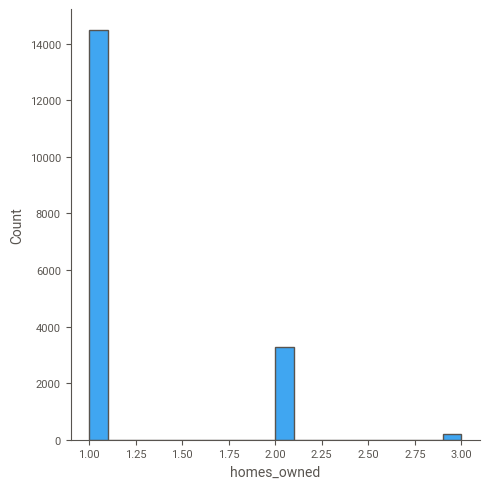

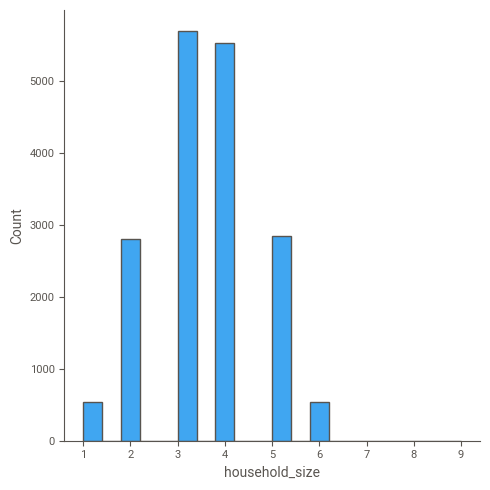

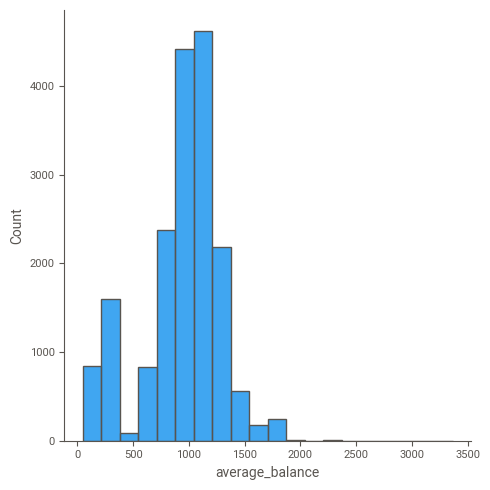

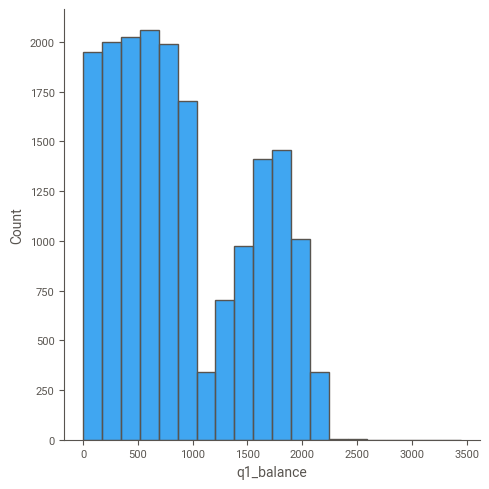

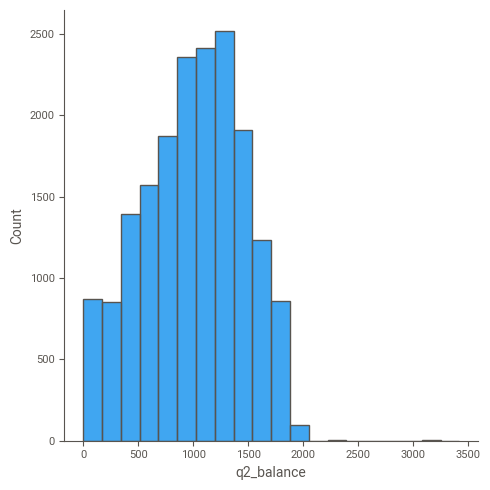

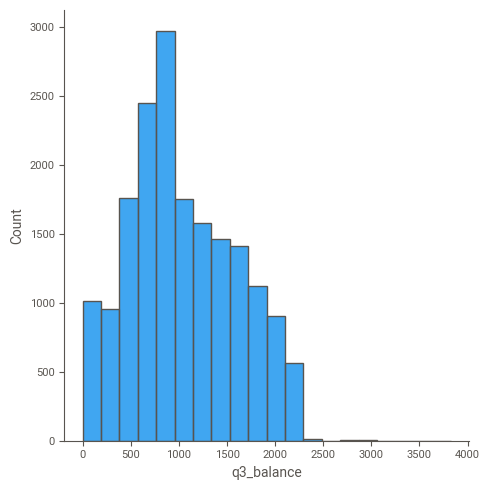

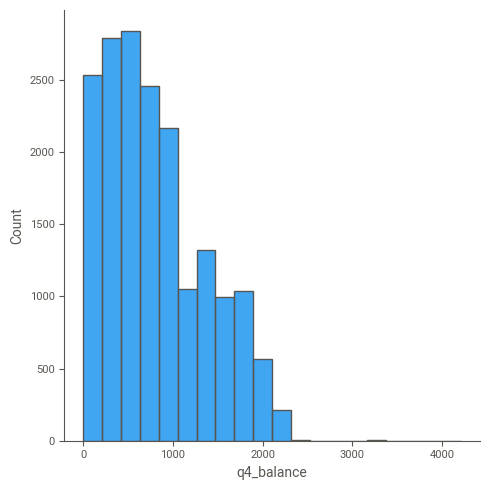

In [18]:
# We can see all the histograms here as well

for col in d_num.columns:
    sns.displot(d_num[col],bins=20)
    plt.show()

## Drop ID column

In [19]:
# We drop customer_number column to avoid overfitting when we apply the machine learning models
d_num.drop(['customer_number'], axis = 1, inplace = True)

## Finding correlation between features

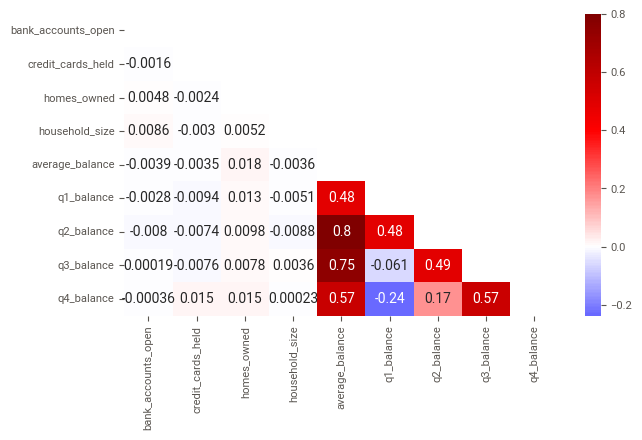

In [20]:
# We create a correlation matrix to check the correlation between features

plt.rcParams["figure.figsize"] = (7,4)
mask =np.zeros_like(d_num.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(d_num.corr(), mask=mask, annot=True, cmap='seismic', center=0);

# We see that way may have collinearity between the average balance column and the other balance columns, which would be quite logic
# We will try a first model without droping any column and then we will iterate by droping the quarterly ones
# We see no correlation between the rest of the numeric features

## Rescale the features

In [21]:
d_num.columns

Index(['bank_accounts_open', 'credit_cards_held', 'homes_owned',
       'household_size', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance'],
      dtype='object')

In [22]:
columns = ['bank_accounts_open', 'credit_cards_held', 'homes_owned',
       'household_size', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance']

In [23]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler()
d_num[columns] = min_max.fit_transform(d_num[columns])
# we have rescaled all features

# Categorical columns handling

## Check nulls, blanks and cardinality

In [24]:
# We have no nulls (we have seen it in the df info)

In [25]:
# We check the values to ensure that there are no blanks and to analyse cardinality 
# No nulls are detected and we don't see anything we want to group
d_cat.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'overdraft_protection', 'credit_rating', 'own_your_home'],
      dtype='object')

In [26]:
d_cat['reward'].value_counts()

Air Miles    6047
Cash Back    5995
Points       5934
Name: reward, dtype: int64

In [27]:
d_cat['mailer_type'].value_counts()

Postcard    9134
Letter      8842
Name: mailer_type, dtype: int64

In [28]:
d_cat['income_level'].value_counts()

Medium    9002
High      4519
Low       4455
Name: income_level, dtype: int64

In [29]:
d_cat['overdraft_protection'].value_counts()

No     15300
Yes     2676
Name: overdraft_protection, dtype: int64

In [30]:
d_cat['credit_rating'].value_counts()

High      6064
Medium    5964
Low       5948
Name: credit_rating, dtype: int64

In [31]:
d_cat['own_your_home'].value_counts()

Yes    11636
No      6340
Name: own_your_home, dtype: int64

## Check correlation between features and the target

In [32]:
# We use chi squared test to check correlation between features and the target 
from scipy.stats import chi2_contingency

In [33]:
data_crosstab=pd.crosstab(d_cat['reward'],d_cat['offer_accepted'], margins=False)
chi2_contingency(data_crosstab, correction=False)
# There is correlation with reward

(101.14767025681465,
 1.0865819216542505e-22,
 2,
 array([[5703.54277926,  343.45722074],
        [5654.49627281,  340.50372719],
        [5596.96094793,  337.03905207]]))

In [34]:
data_crosstab=pd.crosstab(d_cat['mailer_type'],d_cat['offer_accepted'], margins=False)
chi2_contingency(data_crosstab, correction=False)
# There is correlation with mailer_type

(169.8785866150883,
 7.864741197933402e-39,
 1,
 array([[8339.79250111,  502.20749889],
        [8615.20749889,  518.79250111]]))

In [35]:
data_crosstab=pd.crosstab(d_cat['income_level'],d_cat['offer_accepted'], margins=False)
chi2_contingency(data_crosstab, correction=False)
# There is correlation with income_level

(113.61760484801982,
 2.1293673159685707e-25,
 2,
 array([[4262.33005118,  256.66994882],
        [4201.96512016,  253.03487984],
        [8490.70482866,  511.29517134]]))

In [36]:
data_crosstab=pd.crosstab(d_cat['overdraft_protection'],d_cat['offer_accepted'], margins=False)
chi2_contingency(data_crosstab, correction=False)
# There is NO correlation with overdraft_protection

(0.1305604331486984,
 0.7178516689441322,
 1,
 array([[14430.99132176,   869.00867824],
        [ 2524.00867824,   151.99132176]]))

In [37]:
data_crosstab=pd.crosstab(d_cat['credit_rating'],d_cat['offer_accepted'], margins=False)
chi2_contingency(data_crosstab, correction=False)
# There is correlation with credit_rating

(445.0621419387729,
 2.2697803189923953e-97,
 2,
 array([[5719.57721406,  344.42278594],
        [5610.16577659,  337.83422341],
        [5625.25700935,  338.74299065]]))

In [38]:
data_crosstab=pd.crosstab(d_cat['own_your_home'],d_cat['offer_accepted'], margins=False)
chi2_contingency(data_crosstab, correction=False)
# There is NO correlation with own your home

(4.459812057796639e-05,
 0.9946716209502822,
 1,
 array([[ 5979.90097908,   360.09902092],
        [10975.09902092,   660.90097908]]))

## Encode categorical variables

In [39]:
# First we need to drop our target column and encode it separately, as we don't want to have its values in 2 columns
y = d_cat['offer_accepted'] # I already define y to use it later as I am dropping it from the main df
d_cat.drop(['offer_accepted'], axis = 1, inplace = True) 

In [40]:
d_cat_enc=pd.get_dummies(d_cat)

In [41]:
d_cat_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 0 to 17999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   reward_Air Miles          17976 non-null  uint8
 1   reward_Cash Back          17976 non-null  uint8
 2   reward_Points             17976 non-null  uint8
 3   mailer_type_Letter        17976 non-null  uint8
 4   mailer_type_Postcard      17976 non-null  uint8
 5   income_level_High         17976 non-null  uint8
 6   income_level_Low          17976 non-null  uint8
 7   income_level_Medium       17976 non-null  uint8
 8   overdraft_protection_No   17976 non-null  uint8
 9   overdraft_protection_Yes  17976 non-null  uint8
 10  credit_rating_High        17976 non-null  uint8
 11  credit_rating_Low         17976 non-null  uint8
 12  credit_rating_Medium      17976 non-null  uint8
 13  own_your_home_No          17976 non-null  uint8
 14  own_your_home_Yes         17976 non-nu

In [42]:
# Then we can encode our target

y_enc=pd.get_dummies(y, drop_first=True) #drop_first allows us to do it in one single column

In [43]:
y_enc.shape

(17976, 1)

In [44]:
y_enc.value_counts()

Yes
0      16955
1       1021
dtype: int64

# Bring the data frame back together

In [45]:
# check the shape 
print(d_num.shape) 
print('numbers and ')
print(d_cat_enc.shape)
print('categories')

(17976, 9)
numbers and 
(17976, 15)
categories


In [46]:
dfc=pd.concat([d_num,d_cat_enc],axis=1)

# Select target and independent features

In [47]:
# target: y was already defined when we encoded the categorical variables

In [48]:
# features
X= dfc

# Power transformation

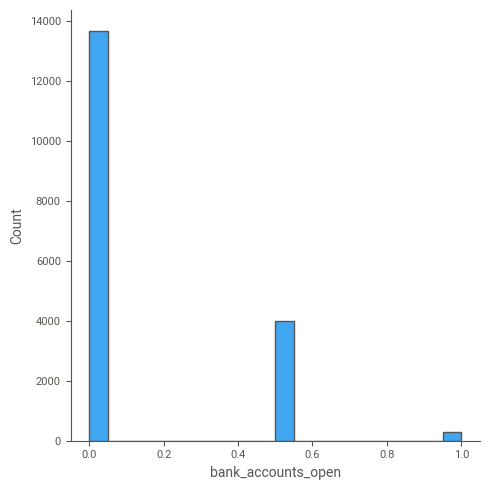

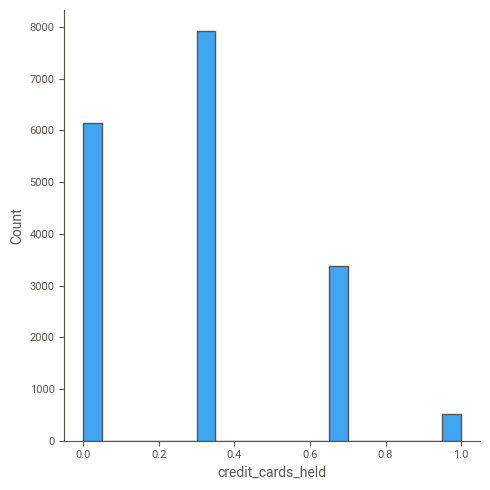

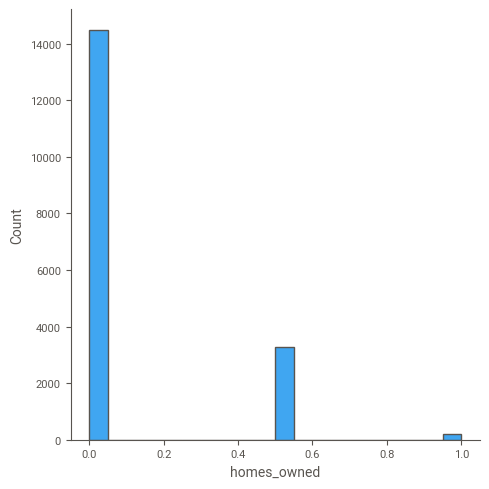

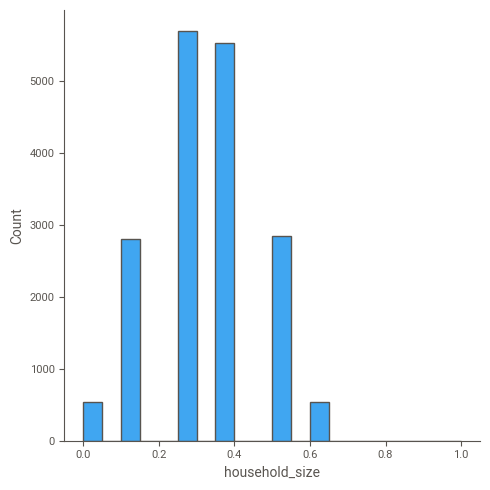

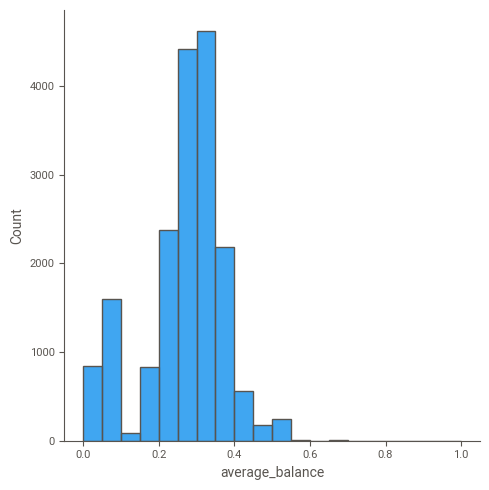

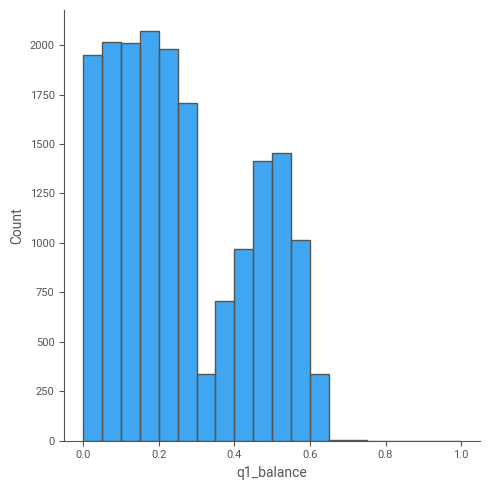

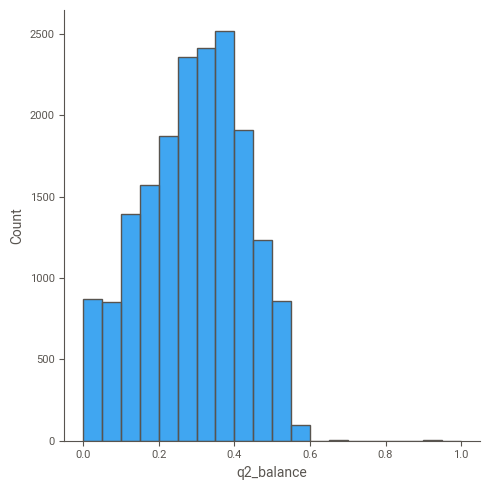

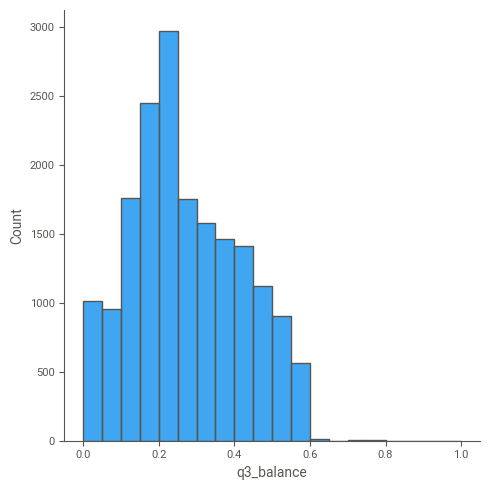

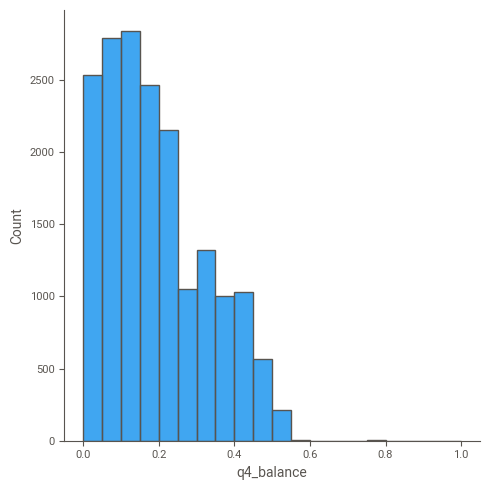

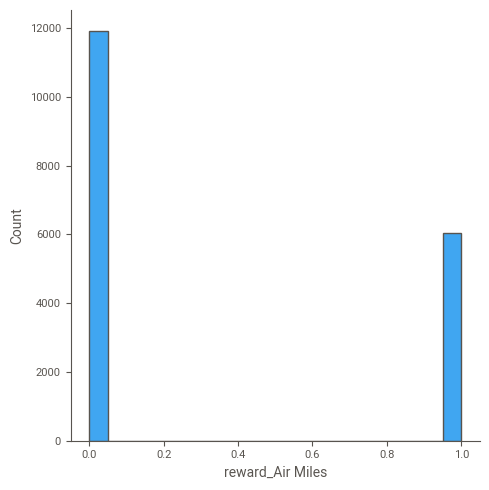

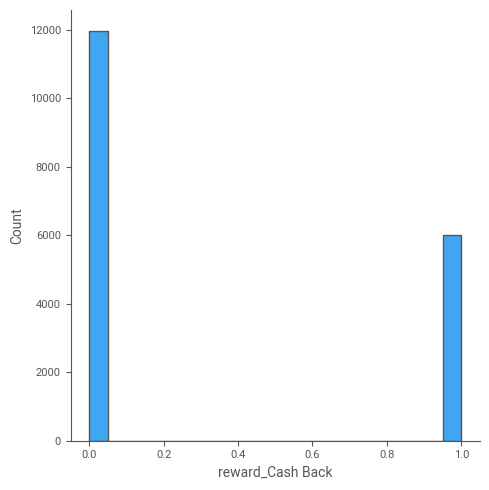

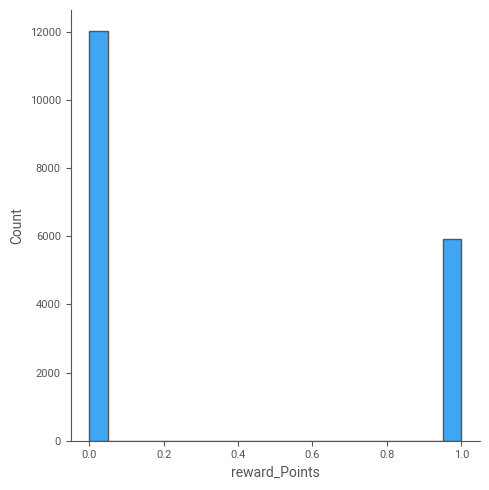

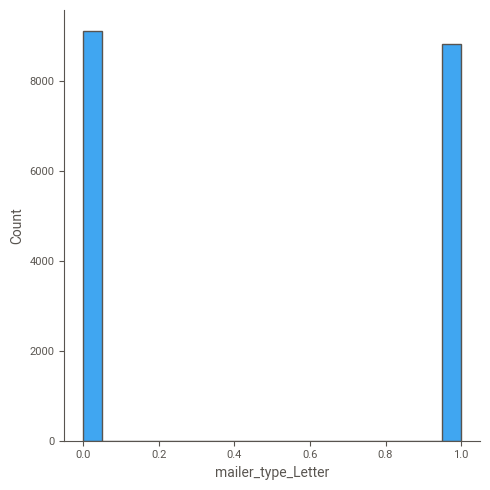

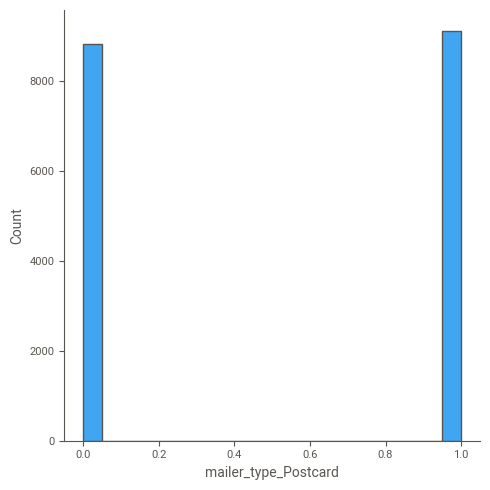

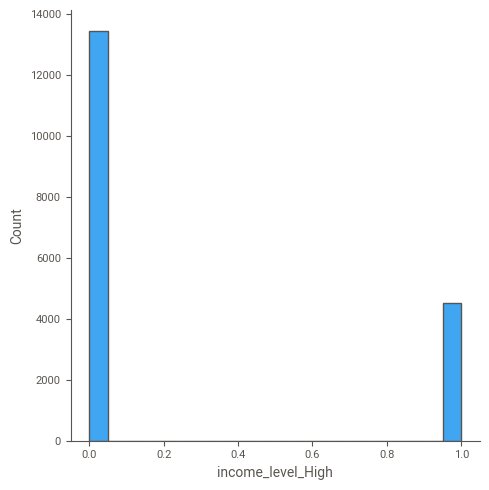

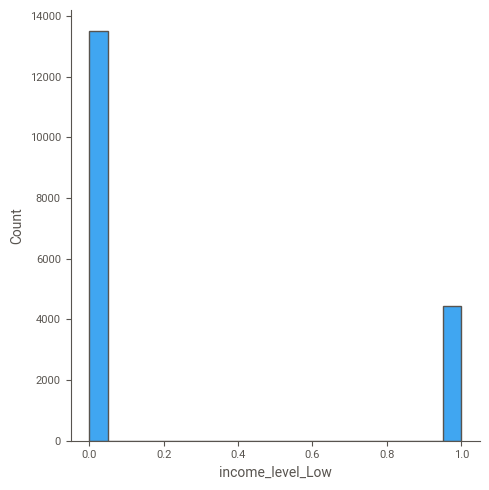

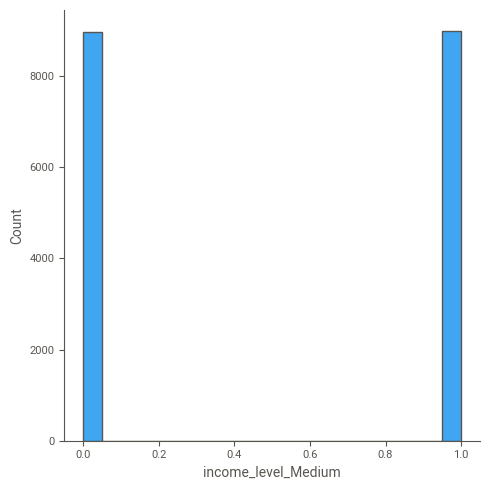

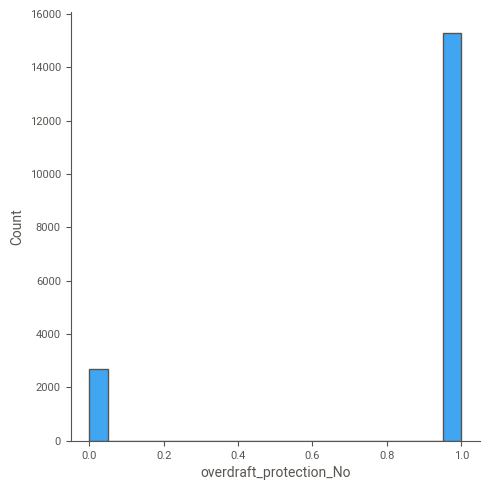

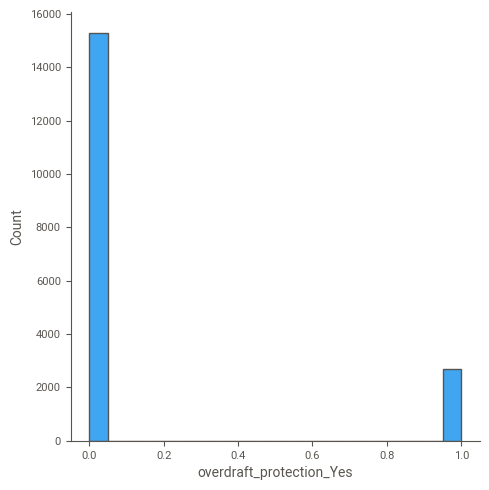

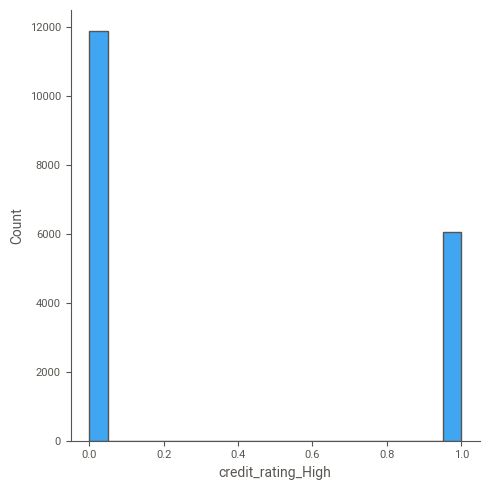

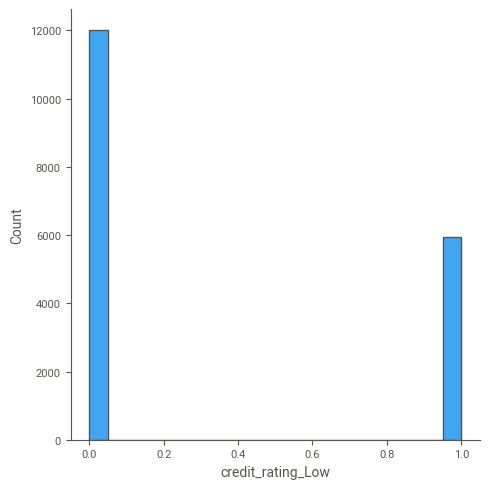

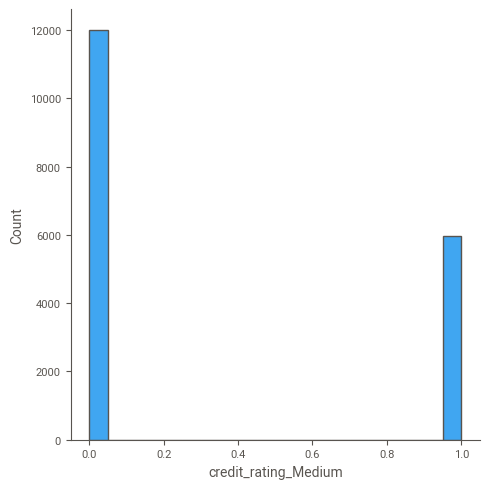

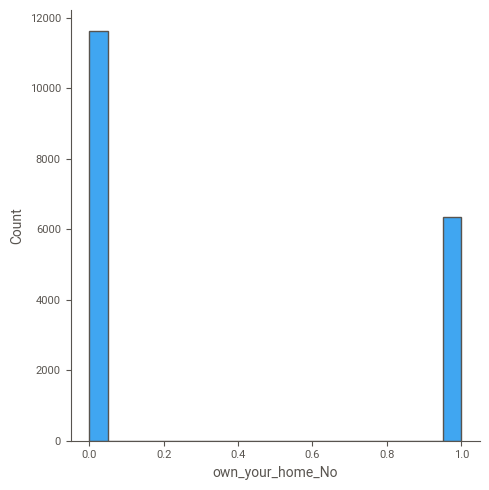

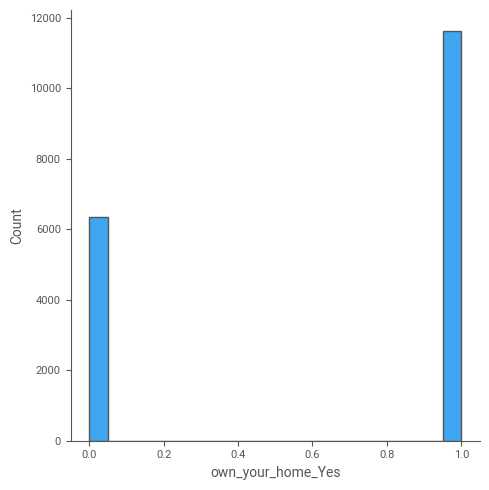

In [49]:
# Machine learning models work better with normal distributions
# We need to check the columns that are not following a normal distribution and try to transform them
# This is not possible for all of them, so just when appropiate

for col in X.columns:
    sns.displot(X[col],bins=20)
    plt.show()

We are going to apply Log transformation to the following columns:
- average_balance
- q1_balance
- q4_balance


In [50]:
# Create a function for the Log transformation:

def log_transform(x):
    x=np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0 

In [51]:
# Log transformation by creating a copy of the column: average_balance
np.seterr(divide = 'ignore') 
avg_balance_log=list(map(log_transform,X['average_balance']))

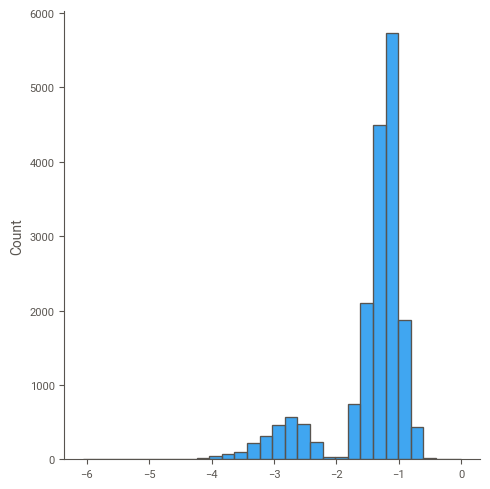

In [52]:
sns.displot(avg_balance_log, bins=30); #it is not improving, but getting more bimodal, so we will leave the original distribution

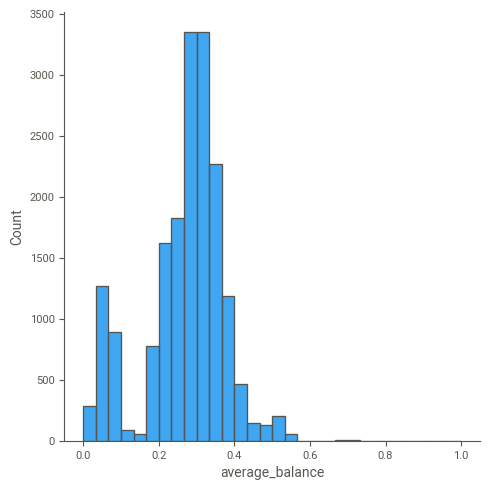

In [53]:
sns.displot(X['average_balance'], bins=30);

In [54]:
# Log transformation by creating a copy of the column: q1_balance
np.seterr(divide = 'ignore') 
q1_balance_log=list(map(log_transform,X['q1_balance']))

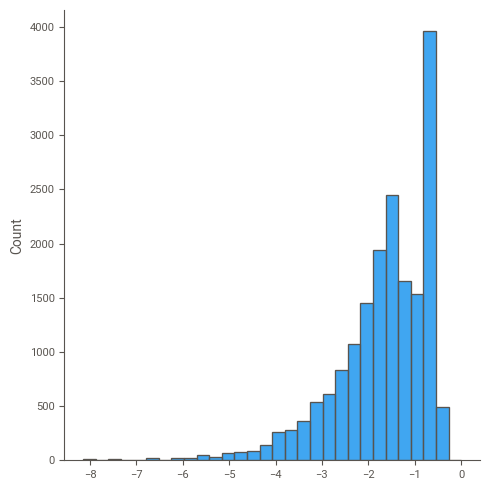

In [55]:
sns.displot(q1_balance_log, bins=30); #it is not normal but better than the original one (we keep that one)

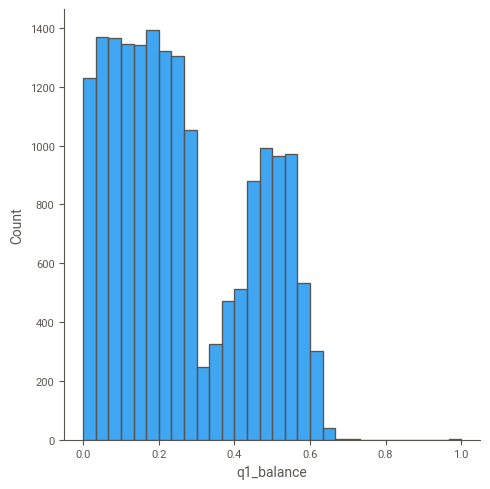

In [56]:
sns.displot(X['q1_balance'], bins=30);

In [57]:
# Log transformation by creating a copy of the column: q4_balance
np.seterr(divide = 'ignore') 
q4_balance_log=list(map(log_transform,X['q4_balance']))

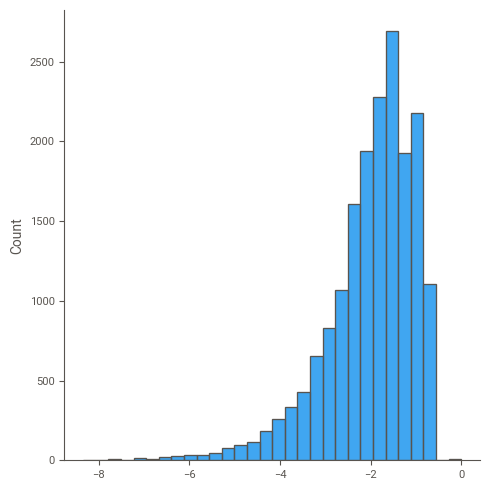

In [58]:
sns.displot(q4_balance_log, bins=30); #it is not normal but better than the original one (we keep that one)

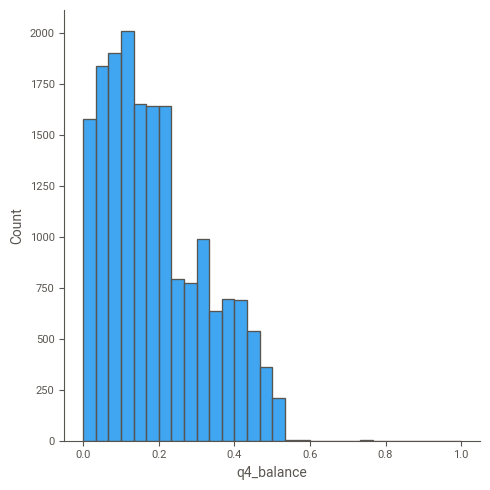

In [59]:
sns.displot(X['q4_balance'], bins=30);

In [60]:
# We substitute the two improved columns
X.drop(['q1_balance', 'q4_balance'], axis = 1, inplace = True) 
X['q1_balance_log'] = q1_balance_log
X['q4_balance_log'] = q4_balance_log

In [61]:
X.columns

Index(['bank_accounts_open', 'credit_cards_held', 'homes_owned',
       'household_size', 'average_balance', 'q2_balance', 'q3_balance',
       'reward_Air Miles', 'reward_Cash Back', 'reward_Points',
       'mailer_type_Letter', 'mailer_type_Postcard', 'income_level_High',
       'income_level_Low', 'income_level_Medium', 'overdraft_protection_No',
       'overdraft_protection_Yes', 'credit_rating_High', 'credit_rating_Low',
       'credit_rating_Medium', 'own_your_home_No', 'own_your_home_Yes',
       'q1_balance_log', 'q4_balance_log'],
      dtype='object')

# Import an apply the first model (Logistic Regression)

In [62]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression() 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.3, random_state=40)
clf=logreg.fit(X_train,y_train) # train the model

# Evaluate the model

In [63]:
y_pred=clf.predict(X_test) # predict y values

In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [65]:
accuracy_score(y_test,y_pred) # global accuracy of the model (not really meaningful in that case)

0.9415909512330799

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

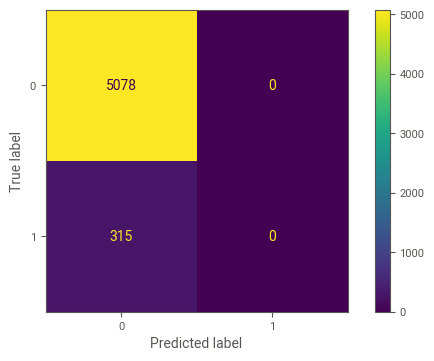

In [67]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_) # as we expected, we have a problem of inbalanced data
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot();

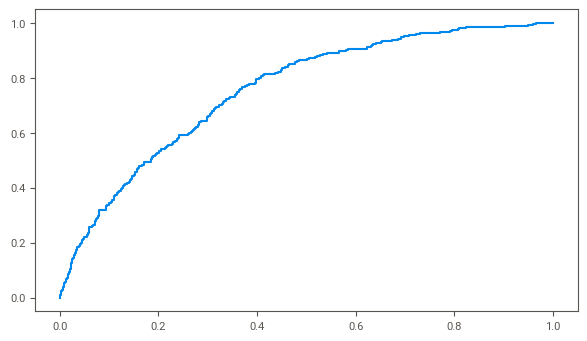

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred_probability=clf.predict_proba(X_test)[::,1]
fpr,tpr,_=roc_curve(y_test,y_pred_probability)
auc=roc_auc_score(y_test,y_pred_probability)
plt.plot(fpr, tpr, label='model 1, auc='+str(auc))
plt.show()

In [69]:
target_names = ['bad loans', 'good loans']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   bad loans       0.94      1.00      0.97      5078
  good loans       0.00      0.00      0.00       315

    accuracy                           0.94      5393
   macro avg       0.47      0.50      0.48      5393
weighted avg       0.89      0.94      0.91      5393



# Iterations on the Logistic Regression model

## Using SMOTE

In [70]:
from imblearn.over_sampling import SMOTE 

In [71]:
smt= SMOTE()

In [72]:
X_S,y_enc_S=smt.fit_resample(X,y_enc) # resampling the database by applying the SMOTE model

In [73]:
y_enc.shape

(17976, 1)

In [74]:
y_enc.value_counts()

Yes
0      16955
1       1021
dtype: int64

In [75]:
y_enc_S.shape #applying this over sampling model we have increased the number of rows

(33910, 1)

In [76]:
X_S.shape

(33910, 24)

In [77]:
y_enc_S.value_counts() # we have now the same amount of rows for Yes and No

Yes
0      16955
1      16955
dtype: int64

In [78]:
# train the model
logreg=LogisticRegression() 
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_enc_S, test_size=0.3, random_state=40)
clf_S=logreg.fit(X_train_S,y_train_S) 

In [79]:
y_pred_S=clf_S.predict(X_test_S) #run the model

In [80]:
accuracy_score(y_test_S,y_pred_S)

0.783741275926472

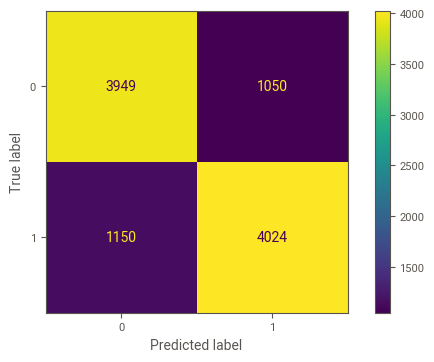

In [81]:
cm = confusion_matrix(y_test_S, y_pred_S, labels=clf_S.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_S.classes_)
disp.plot();  # this model fits way better than the last one. 

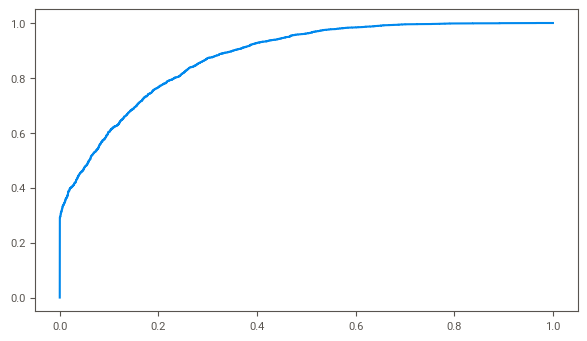

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred_probability=clf_S.predict_proba(X_test_S)[::,1]
fpr,tpr,_=roc_curve(y_test_S,y_pred_probability)
auc=roc_auc_score(y_test_S,y_pred_probability)
plt.plot(fpr, tpr, label='model 1, auc='+str(auc))
plt.show()

In [83]:
target_names = ['No', 'Yes']
print(classification_report(y_test_S, y_pred_S, target_names=target_names))

              precision    recall  f1-score   support

          No       0.77      0.79      0.78      4999
         Yes       0.79      0.78      0.79      5174

    accuracy                           0.78     10173
   macro avg       0.78      0.78      0.78     10173
weighted avg       0.78      0.78      0.78     10173



## Using Tomek Links

In [84]:
from imblearn.under_sampling import TomekLinks

In [85]:
tomek=TomekLinks()

In [86]:
X_T,y_enc_T=tomek.fit_resample(X,y_enc)

In [87]:
y_enc.shape

(17976, 1)

In [88]:
y_enc.value_counts()

Yes
0      16955
1       1021
dtype: int64

In [89]:
y_enc_T.shape # we are reducing the rows of the dataset by reducing the majority class

(17498, 1)

In [90]:
X_T.shape

(17498, 24)

In [91]:
y_enc_T.value_counts()

Yes
0      16477
1       1021
dtype: int64

In [92]:
X_train_T, X_test_T, y_train_T, y_test_T = train_test_split(X_T, y_enc_T, test_size=0.3, random_state=40)

In [93]:
clf_T=logreg.fit(X_train_T,y_train_T) # train the model

In [94]:
y_pred_T=clf_T.predict(X_test_T) #run the model

In [95]:
accuracy_score(y_test_T,y_pred_T)

0.9407619047619048

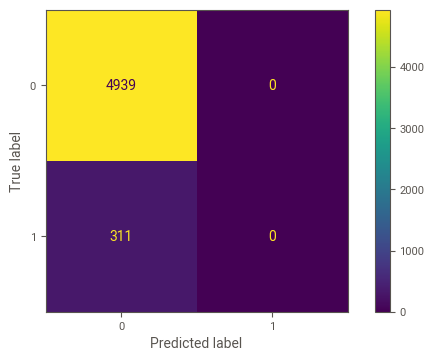

In [96]:
cm = confusion_matrix(y_test_T, y_pred_T, labels=clf_T.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_T.classes_)
disp.plot();
# Tomek Links is not fixing our imbalanced data problem

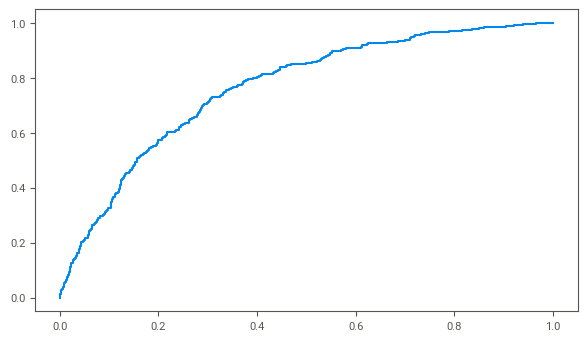

In [97]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred_probability=clf_T.predict_proba(X_test_T)[::,1]
fpr,tpr,_=roc_curve(y_test_T,y_pred_probability)
auc=roc_auc_score(y_test_T,y_pred_probability)
plt.plot(fpr, tpr, label='model 1, auc='+str(auc))
plt.show()

In [98]:
target_names = ['No', 'Yes']
print(classification_report(y_test_T, y_pred_T, target_names=target_names))

              precision    recall  f1-score   support

          No       0.94      1.00      0.97      4939
         Yes       0.00      0.00      0.00       311

    accuracy                           0.94      5250
   macro avg       0.47      0.50      0.48      5250
weighted avg       0.89      0.94      0.91      5250



## Iterating by feature engineering: dropping q balance columns

In [99]:
# We have a column that contains the average_balance and we have observed a high correlation with the other for columns that provide detail for each Q
# We may try to drop the Q balance columns and see the result (this may avoid collinearity)
# We will do this test using the SMOTE df as is the one that gave us the best results

In [100]:
X_S.columns

Index(['bank_accounts_open', 'credit_cards_held', 'homes_owned',
       'household_size', 'average_balance', 'q2_balance', 'q3_balance',
       'reward_Air Miles', 'reward_Cash Back', 'reward_Points',
       'mailer_type_Letter', 'mailer_type_Postcard', 'income_level_High',
       'income_level_Low', 'income_level_Medium', 'overdraft_protection_No',
       'overdraft_protection_Yes', 'credit_rating_High', 'credit_rating_Low',
       'credit_rating_Medium', 'own_your_home_No', 'own_your_home_Yes',
       'q1_balance_log', 'q4_balance_log'],
      dtype='object')

In [101]:
selected_columns = X_S[['bank_accounts_open', 'credit_cards_held', 'homes_owned',
       'household_size', 'average_balance', 'q2_balance', 'q3_balance',
       'reward_Air Miles', 'reward_Cash Back', 'reward_Points',
       'mailer_type_Letter', 'mailer_type_Postcard', 'income_level_High',
       'income_level_Low', 'income_level_Medium', 'overdraft_protection_No',
       'overdraft_protection_Yes', 'credit_rating_High', 'credit_rating_Low',
       'credit_rating_Medium', 'own_your_home_No', 'own_your_home_Yes',
       'q1_balance_log', 'q4_balance_log']]
X2_S = selected_columns.copy() # we create a copy of the df just in case we finally don't want to apply changes
X2_S.drop(['q1_balance_log', 'q2_balance','q3_balance','q4_balance_log'], axis = 1, inplace = True) 

In [102]:
# train the model
logreg=LogisticRegression() 
X2_train_SI, X2_test_SI, y_train_SI, y_test_SI = train_test_split(X2_S, y_enc_S, test_size=0.3, random_state=40)
clf_SI=logreg.fit(X2_train_SI,y_train_SI) 

In [103]:
y_pred_SI=clf_SI.predict(X2_test_SI) #run the model

In [104]:
accuracy_score(y_test_SI,y_pred_SI)

0.7814803892657033

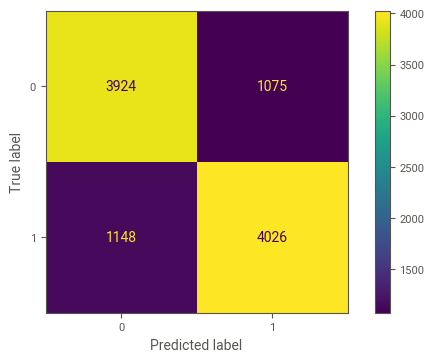

In [105]:
cm = confusion_matrix(y_test_SI, y_pred_SI, labels=clf_SI.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_SI.classes_)
disp.plot();  # the impact is not very significant and the model is a bit worse 

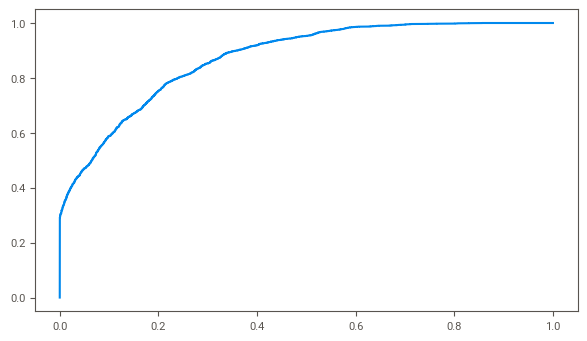

In [106]:
y_pred_probability=clf_SI.predict_proba(X2_test_SI)[::,1]
fpr,tpr,_=roc_curve(y_test_SI,y_pred_probability)
auc=roc_auc_score(y_test_SI,y_pred_probability)
plt.plot(fpr, tpr, label='model 1, auc='+str(auc))
plt.show()

In [107]:
target_names = ['No', 'Yes']
print(classification_report(y_test_SI, y_pred_SI, target_names=target_names))

              precision    recall  f1-score   support

          No       0.77      0.78      0.78      4999
         Yes       0.79      0.78      0.78      5174

    accuracy                           0.78     10173
   macro avg       0.78      0.78      0.78     10173
weighted avg       0.78      0.78      0.78     10173



## Iterating by feature engineering: droping non-correlated features

In the categorical columns handling section, we saw that this features were not correlated with our target:
- overdraft protection
- own your home

Doing some EDA in Tableau, we also saw that these other numerical features were not correlated with the target:

- average balance
- q1_balance
- q2_balance
- q3_balance
- q4_balance

In [108]:
# We are going to use the Logistic Regression model with SMOTE as it is the one that gave us the best results
# Droping columns
selected_columns = X_S[['bank_accounts_open', 'credit_cards_held', 'homes_owned',
       'household_size', 'average_balance', 'q2_balance', 'q3_balance',
       'reward_Air Miles', 'reward_Cash Back', 'reward_Points',
       'mailer_type_Letter', 'mailer_type_Postcard', 'income_level_High',
       'income_level_Low', 'income_level_Medium', 'overdraft_protection_No',
       'overdraft_protection_Yes', 'credit_rating_High', 'credit_rating_Low',
       'credit_rating_Medium', 'own_your_home_No', 'own_your_home_Yes',
       'q1_balance_log', 'q4_balance_log']]
X3_S = selected_columns.copy() # we create a copy of the df just in case we finally don't want to apply changes
X3_S.drop(['q1_balance_log', 'q2_balance','q3_balance','q4_balance_log','average_balance','overdraft_protection_No',
       'overdraft_protection_Yes','own_your_home_No', 'own_your_home_Yes'], axis = 1, inplace = True) 

In [109]:
logreg=LogisticRegression() 
X3_train_SII, X3_test_SII, y_train_SII, y_test_SII = train_test_split(X3_S, y_enc_S, test_size=0.3, random_state=40)
clf_SII=logreg.fit(X3_train_SII,y_train_SII) # train the model

In [110]:
y_pred_SII=clf_SII.predict(X3_test_SII) #run the model

In [111]:
accuracy_score(y_test_SII,y_pred_SII)

0.7577902290376487

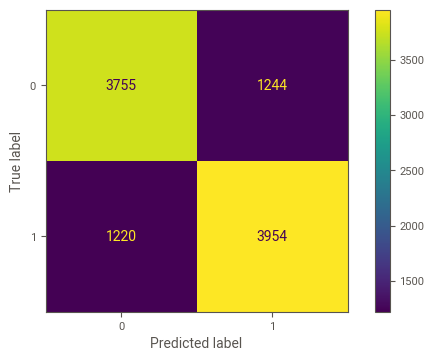

In [112]:
cm = confusion_matrix(y_test_SII, y_pred_SII, labels=clf_SII.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_SII.classes_)
disp.plot();  # the impact is not very significant and the model is a bit worse 

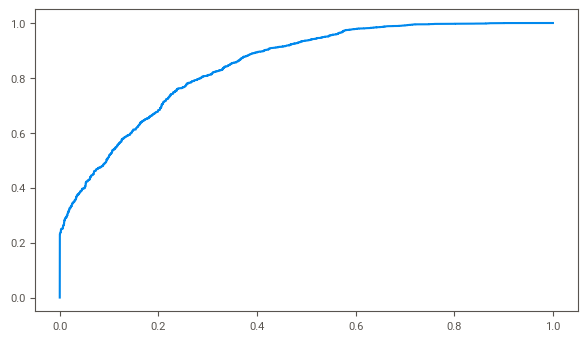

In [113]:
y_pred_probability=clf_SII.predict_proba(X3_test_SII)[::,1]
fpr,tpr,_=roc_curve(y_test_SII,y_pred_probability)
auc=roc_auc_score(y_test_SII,y_pred_probability)
plt.plot(fpr, tpr, label='model 1, auc='+str(auc))
plt.show()

In [114]:
target_names = ['No', 'Yes']
print(classification_report(y_test_SII, y_pred_SII, target_names=target_names))

              precision    recall  f1-score   support

          No       0.75      0.75      0.75      4999
         Yes       0.76      0.76      0.76      5174

    accuracy                           0.76     10173
   macro avg       0.76      0.76      0.76     10173
weighted avg       0.76      0.76      0.76     10173



## Using SMOTE and Tomek Links combined

In [115]:
from imblearn.combine import SMOTETomek

In [116]:
M = SMOTETomek(random_state=42)

In [117]:
X_M, y_enc_M = M.fit_resample(X, y_enc) # train the model

In [118]:
# train the model
logreg=LogisticRegression() 
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_M, y_enc_M, test_size=0.3, random_state=40)
clf_M=logreg.fit(X_train_M,y_train_M)

In [119]:
y_pred_M=clf_M.predict(X_test_M) #run the model

In [120]:
accuracy_score(y_test_M,y_pred_M)

0.7825229312555478

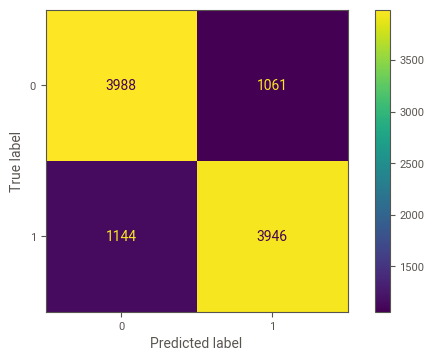

In [121]:
cm = confusion_matrix(y_test_M, y_pred_M, labels=clf_M.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_M.classes_)
disp.plot(); # I obtain quite similar results to SMOTE but a bit worse

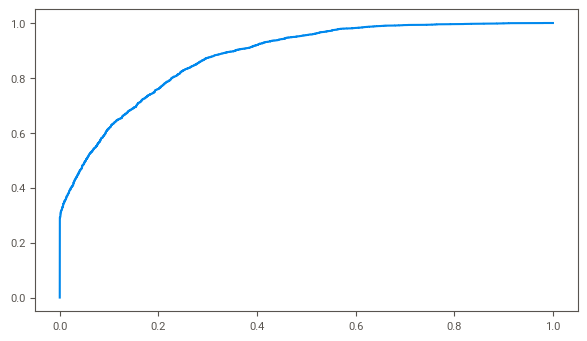

In [122]:
y_pred_probability=clf_M.predict_proba(X_test_M)[::,1]
fpr,tpr,_=roc_curve(y_test_M,y_pred_probability)
auc=roc_auc_score(y_test_M,y_pred_probability)
plt.plot(fpr, tpr, label='model 1, auc='+str(auc))
plt.show()

In [123]:
target_names = ['No', 'Yes']
print(classification_report(y_test_M, y_pred_M, target_names=target_names))

              precision    recall  f1-score   support

          No       0.78      0.79      0.78      5049
         Yes       0.79      0.78      0.78      5090

    accuracy                           0.78     10139
   macro avg       0.78      0.78      0.78     10139
weighted avg       0.78      0.78      0.78     10139



# Trying another model: KNN classification

In [124]:
# We apply this model using also SMOTE, as it is the one that gives the best results to fix imbalanced data

In [125]:
from sklearn.neighbors import KNeighborsClassifier 

In [126]:
Knn=KNeighborsClassifier(n_neighbors=5)

In [127]:
y_enc_S.shape

(33910, 1)

In [128]:
y_enc_S=y_enc_S['Yes'].to_numpy()

In [129]:
X_train_SK, X_test_SK, y_train_SK, y_test_SK = train_test_split(X_S, y_enc_S, test_size=0.30,random_state=40)

In [130]:
y_train_SK.shape

(23737,)

In [131]:
tk = Knn.fit(X_train_SK,y_train_SK) # train the model

In [132]:
y_pred_SK=Knn.predict(X_test_SK) # run the model

In [133]:
y_pred_SK

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [134]:
accuracy_score(y_test_SK,y_pred_SK)

0.8921655362233363

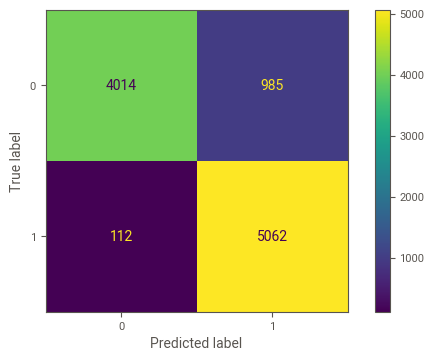

In [135]:
cm = confusion_matrix(y_test_SK, y_pred_SK, labels=tk.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tk.classes_)
disp.plot(); # This model works way better than the Logistic regression!

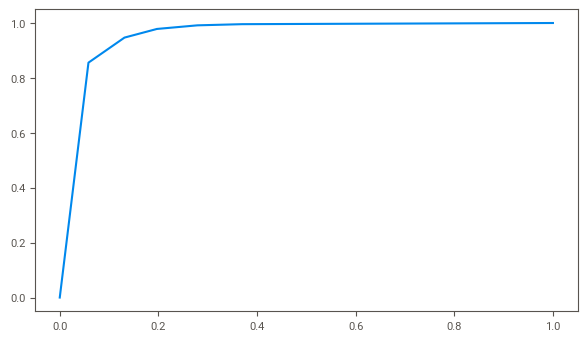

In [136]:
y_pred_probability=tk.predict_proba(X_test_SK)[::,1]
fpr,tpr,_=roc_curve(y_test_SK,y_pred_probability)
auc=roc_auc_score(y_test_SK,y_pred_probability)
plt.plot(fpr, tpr, label='model 1, auc='+str(auc))
plt.show()

In [137]:
target_names = ['No', 'Yes']
print(classification_report(y_test_SK, y_pred_SK, target_names=target_names))

              precision    recall  f1-score   support

          No       0.97      0.80      0.88      4999
         Yes       0.84      0.98      0.90      5174

    accuracy                           0.89     10173
   macro avg       0.90      0.89      0.89     10173
weighted avg       0.90      0.89      0.89     10173



## Find the best K

In [ ]:
#I couldn't get the outcome because it keeps loading indefinitely
#error_train=[]
#error_test=[]
#for k in range(1,40):
#    knn=KNeighborsClassifier(n_neighbors=k)
#    knn.fit(X_train_SK,y_train_SK)
#    y_pred1=knn.predict(X_train_SK)
#    error_train.append(np.mean(y_train_SK!=y_pred1)) 
#    y_pred2=knn.predict(X_test_SK)
#    error_test.append(np.mean(y_test_SK!=y_pred2))
#plt.plot(range(1,40),error_train,label='train')
#plt.plot(range(1,40),error_test,label='test')
#plt.xlabel('k value')
#plt.ylabel('error')
#plt.legend();

In [139]:
X_test_SK.shape

(10173, 24)

In [140]:
X_train_SK.shape

(23737, 24)

In [141]:
y_train_SK.shape

(23737,)

In [142]:
y_test_SK.shape

(10173,)

# Trying another model: Decision Trees classification

In [143]:
# Again we use it in combination with SMOTE to obtain better results and fix the imbalanced data problem
from sklearn import tree
dtc = tree.DecisionTreeClassifier()

In [144]:
X_train_SD, X_test_SD, y_train_SD, y_test_SD = train_test_split(X_S, y_enc_S, test_size=0.30,random_state=40)

In [145]:
td = dtc.fit(X_train_SD,y_train_SD) # train the model

In [146]:
y_pred_SD=dtc.predict(X_test_SD) # run the model

In [147]:
y_pred_SD

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [148]:
accuracy_score(y_test_SD,y_pred_SD)

0.9275533274353681

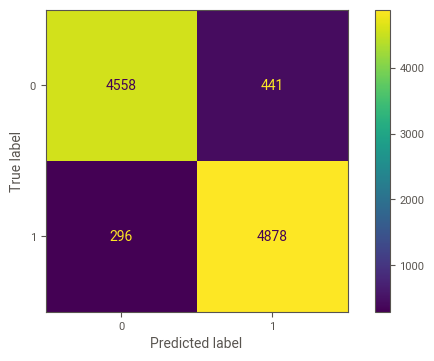

In [149]:
cm = confusion_matrix(y_test_SD, y_pred_SD, labels=td.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=td.classes_)
disp.plot();

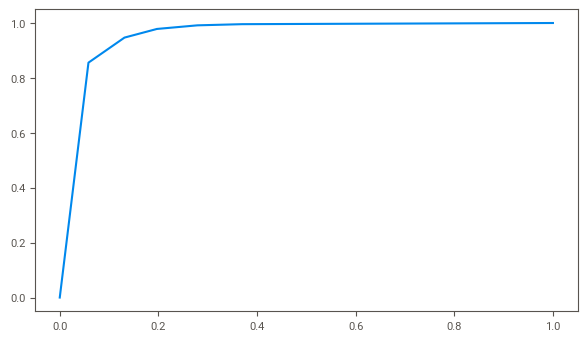

In [150]:
y_pred_probability=tk.predict_proba(X_test_SD)[::,1]
fpr,tpr,_=roc_curve(y_test_SD,y_pred_probability)
auc=roc_auc_score(y_test_SD,y_pred_probability)
plt.plot(fpr, tpr, label='model 1, auc='+str(auc))
plt.show()

In [151]:
target_names = ['No', 'Yes']
print(classification_report(y_test_SD, y_pred_SD, target_names=target_names))

              precision    recall  f1-score   support

          No       0.94      0.91      0.93      4999
         Yes       0.92      0.94      0.93      5174

    accuracy                           0.93     10173
   macro avg       0.93      0.93      0.93     10173
weighted avg       0.93      0.93      0.93     10173

